# Klustering K-Means

Menggunakan package dari sklearn (scikit-learn) untuk melakukan clustering. 

REGRESI
DENGAN VARIABEL NUMERIK DAN KATEGORIK

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# Membaca data
pariwisata = pd.read_excel("pariwisata.xlsx")

In [3]:
# Menampilkan contoh data
pariwisata.tail()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
30,MALUKU,7.57,130.06,4173.0,416005.9,38.10,24.46
31,MALUKU UTARA,0.66,93.65,516.0,308029.4,50.44,23.37
32,PAPUA BARAT,19.25,243.80,1772.0,237191.0,51.16,29.42
33,PAPUA,12.58,449.56,2557.0,448181.0,50.34,32.58
34,INDONESIA,11307.43,74066.92,3283275.0,57370362.0,54.81,31.48


In [4]:
# Menghapus baris terakhir, karena tidak relevan
pariwisata = pariwisata.drop(34, axis = 0)

In [5]:
# Deskripsi data
pariwisata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 33
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Provinsi      34 non-null     object 
 1   jum_asing     34 non-null     float64
 2   jum_lokal     34 non-null     float64
 3   jum_nb_asing  34 non-null     float64
 4   jum_nb_lokal  34 non-null     float64
 5   hunian_b      34 non-null     float64
 6   hunian_nb     34 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.1+ KB


## Visualisasi

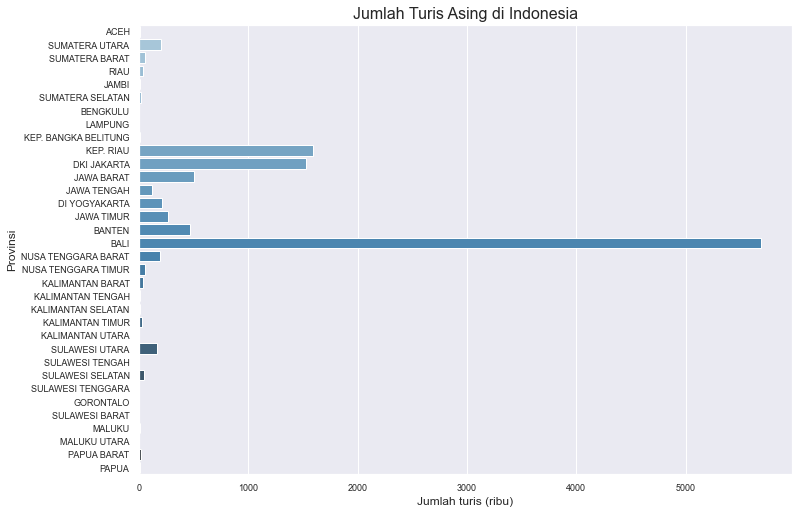

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27) # the size of A4 paper

b = sns.barplot(x = "jum_asing", y = "Provinsi", data = pariwisata, capsize=.2, palette="Blues_d")

b.axes.set_title("Jumlah Turis Asing di Indonesia",fontsize=16)
b.set_xlabel("Jumlah turis (ribu)",fontsize=12)
b.set_ylabel("Provinsi",fontsize=12)
b.tick_params(labelsize=9)
plt.show()

# Save figure
fig.savefig('jum_turis_asing.png')

## Clustering

In [7]:
pariwisata.shape

(34, 7)

In [8]:
# Menentukan variabel yang akan di klusterkan
x = pariwisata.iloc[:, 1:7]
x.head()

,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb
0,9.21,312.73,10803.0,1030136.0,43.18,28.48
1,201.88,2736.09,21104.0,4850322.0,48.86,36.54
2,51.83,1470.99,3786.0,1167212.0,56.00,24.75
3,35.33,4646.98,65845.0,1413345.0,48.69,30.71
4,6.02,502.86,2391.0,429609.7,45.49,23.13


In [9]:
# Mengubah variabel data frame menjadi array
x_array =  np.array(x)
x_array

array([[9.210000e+00, 3.127300e+02, 1.080300e+04, 1.030136e+06,
        4.318000e+01, 2.848000e+01],
       [2.018800e+02, 2.736090e+03, 2.110400e+04, 4.850322e+06,
        4.886000e+01, 3.654000e+01],
       [5.183000e+01, 1.470990e+03, 3.786000e+03, 1.167212e+06,
        5.600000e+01, 2.475000e+01],
       [3.533000e+01, 4.646980e+03, 6.584500e+04, 1.413345e+06,
        4.869000e+01, 3.071000e+01],
       [6.020000e+00, 5.028600e+02, 2.391000e+03, 4.296097e+05,
        4.549000e+01, 2.313000e+01],
       [1.405000e+01, 2.013760e+03, 1.157000e+03, 1.159986e+06,
        5.399000e+01, 3.251000e+01],
       [5.600000e-01, 1.718200e+02, 5.590000e+02, 4.461405e+05,
        6.406000e+01, 2.904000e+01],
       [3.010000e+00, 7.855800e+02, 1.071000e+04, 1.207142e+06,
        6.031000e+01, 3.487000e+01],
       [9.680000e+00, 4.671600e+02, 1.750000e+02, 2.128804e+05,
        3.607000e+01, 2.078000e+01],
       [1.595590e+03, 1.504260e+03, 9.761100e+04, 1.056443e+06,
        5.231000e+01, 3.573

In [10]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [11]:
# Menstandarkan ukuran variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

## Number of Cluster: WSS   

The explanation:
- The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
- The WSS score is the sum of these Squared Errors for all the points.
- Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.

In [12]:
# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

In [13]:
wss = calculate_WSS(x_scaled, 15)

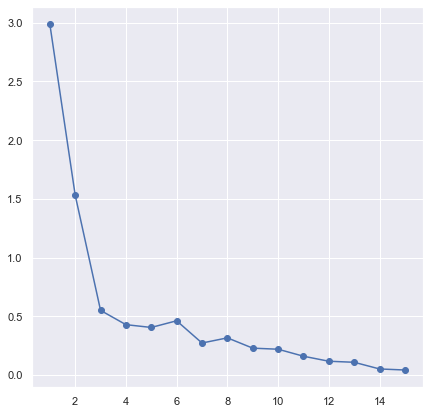

In [14]:
x = np.arange(1, 16, 1)
plt.figure(figsize=[7,7])
plt.plot(x, wss, "b-o")
plt.show()

## Number of cluster: Silhouette   

The Silhouette Index measure the distance between each data point, the centroid of the cluster it was assigned to and the closest centroid belonging to another cluster. In other words, the silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

A **high value** is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = [2, 3, 4, 5, 6]

def shil(X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[:, 0], X[:, 1], marker="o", s=200, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.7978291305199336
For n_clusters = 3 The average silhouette_score is : 0.7892069877736195
For n_clusters = 4 The average silhouette_score is : 0.7562276359581643
For n_clusters = 5 The average silhouette_score is : 0.6405322168253915
For n_clusters = 6 The average silhouette_score is : 0.6011045858825037


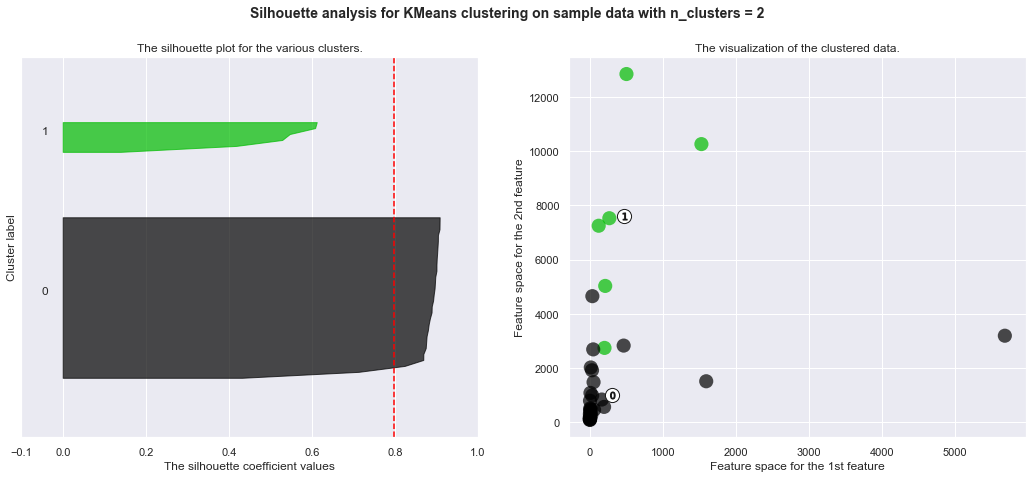

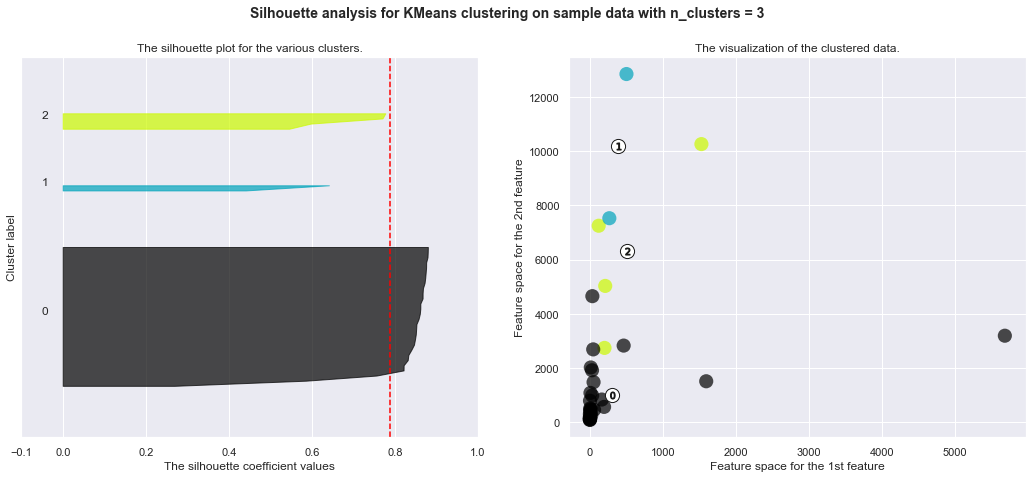

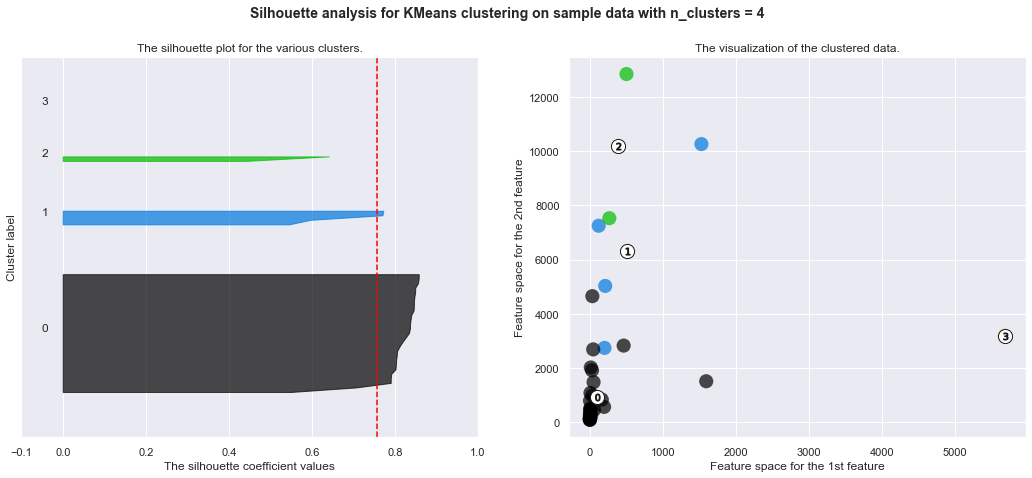

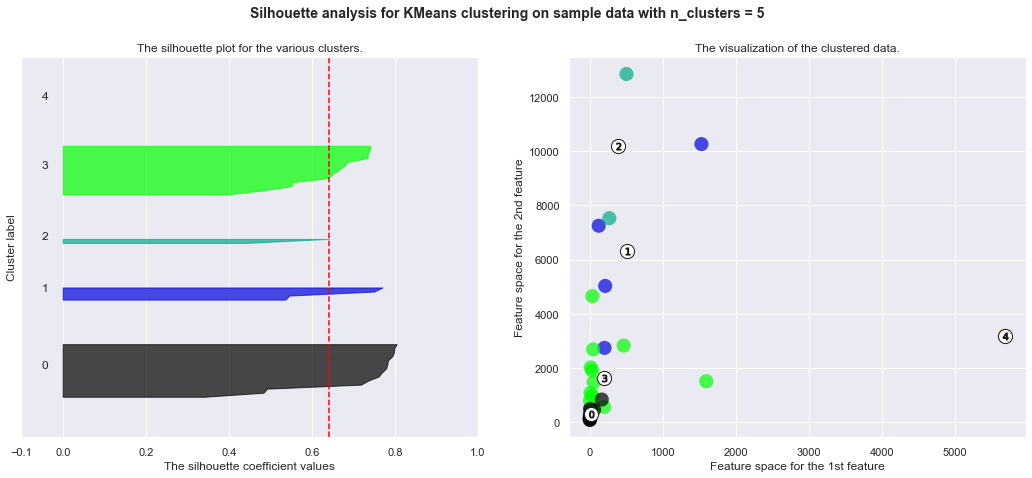

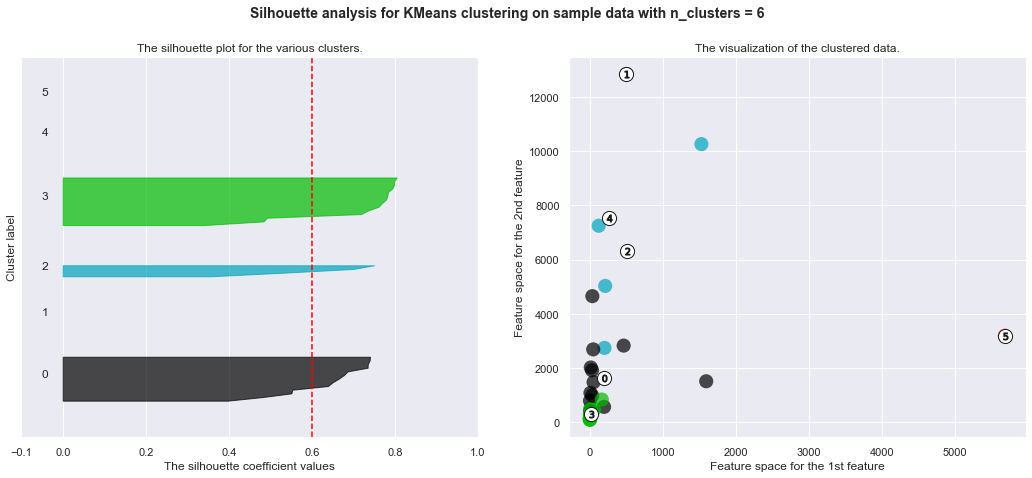

In [88]:
shil(x_array)

## Proses Clustering

In [17]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 4, random_state=123)  

In [18]:
# Menentukan kluster dari data
kmeans.fit(x_scaled) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=123, tol=0.0001, verbose=0)

In [19]:
# Menampilkan pusat cluster
print(kmeans.cluster_centers_)

[[0.00430524 0.01915248 0.01127601 0.04002082 0.35000756 0.15326246]
 [0.03332747 0.14292846 0.00868619 0.14457706 0.66960819 0.33131738]
 [0.1064226  0.73551999 0.01117626 0.72152225 0.65795976 0.45812516]
 [1.         0.24351702 1.         0.18990869 0.88457466 0.41651328]]


In [20]:
# Menampilkan hasil kluster
print(kmeans.labels_)

[0 1 1 1 0 1 1 1 0 1 2 2 2 1 2 1 3 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1]


In [96]:
yy = kmeans.fit_predict(x_scaled)
yy

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 2, 1, 3, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [64]:
# Menambahkan kolom "kluster" dalam data frame ritel
pariwisata["cluster"] = kmeans.labels_
pariwisata.head()

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
0,ACEH,9.21,312.73,10803.0,1030136.0,43.18,28.48,0
1,SUMATERA UTARA,201.88,2736.09,21104.0,4850322.0,48.86,36.54,1
2,SUMATERA BARAT,51.83,1470.99,3786.0,1167212.0,56.00,24.75,1
3,RIAU,35.33,4646.98,65845.0,1413345.0,48.69,30.71,1
4,JAMBI,6.02,502.86,2391.0,429609.7,45.49,23.13,0


# LATIHAN   


Buat visualisasi hasil clustering:
1. Visualisasi cluster
2. Visualisasi untuk profilisasi

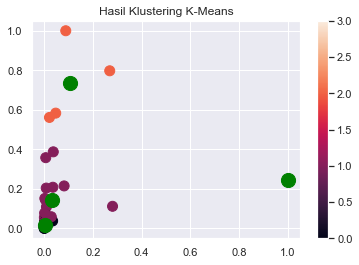

In [80]:
cluster = kmeans.labels_
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = cluster, marker = "o", alpha = 1 )
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c="green", s=200, alpha=1 , marker="o");
plt.title("Hasil Klustering K-Means")
plt.colorbar (output)
plt.show()

In [82]:
label = kmeans.labels_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(pariwisata[label == i , 0] , pariwisata[label == i , 1] , label = i)
plt.legend()
plt.show()

TypeError: '(array([ True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True, False,  True, False,
        True,  True,  True,  True,  True,  True, False]), 0)' is an invalid key

In [53]:
grupcluster = pariwisata.groupby("cluster")

In [57]:
profil = pd.DataFrame(grupcluster.mean())
profil['cluster'] = profil.index

In [58]:
profil

,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
cluster,,,,,,,
0,24.865714,319.820,2.778793e+04,5.198007e+05,45.985714,24.748571,0
1,189.927333,1901.104,2.140940e+04,1.453726e+06,55.040000,31.520000,1
2,605.650000,9471.680,2.754225e+04,6.607157e+06,54.710000,36.342500,2
3,5687.800000,3186.160,2.462937e+06,1.858640e+06,61.130000,34.760000,3


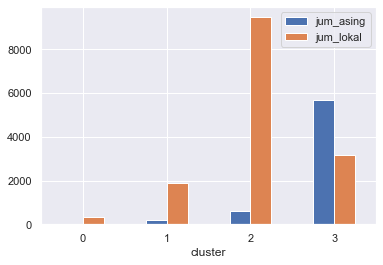

In [74]:
profil.plot(x="cluster", y=["jum_asing", "jum_lokal"], kind="bar")
plt.xticks(rotation=0)
plt.show()


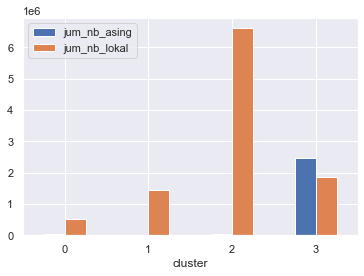

In [73]:
profil.plot(x="cluster", y=["jum_nb_asing", "jum_nb_lokal"], kind="bar")
plt.xticks(rotation=0)
plt.show()


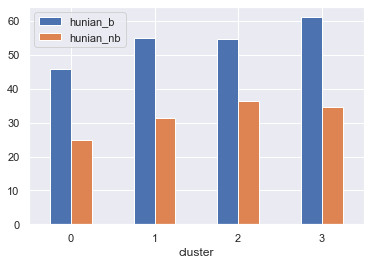

In [72]:
profil.plot(x="cluster", y=["hunian_b", "hunian_nb"], kind="bar")
plt.xticks(rotation=0)
plt.show()



In [62]:
pariwisata.cluster = 2

In [76]:
# Anggota cluster 0
pariwisata[pariwisata.cluster == 0]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
0,ACEH,9.21,312.73,10803.0,1030136.0,43.18,28.48,0
4,JAMBI,6.02,502.86,2391.0,429609.7,45.49,23.13,0
8,KEP. BANGKA BELITUNG,9.68,467.16,175.0,212880.4,36.07,20.78,0
17,NUSA TENGGARA BARAT,195.80,557.37,237746.0,932996.5,42.23,27.39,0
18,NUSA TENGGARA TIMUR,58.59,449.67,112806.0,456460.6,52.17,23.52,0
19,KALIMANTAN BARAT,33.00,977.22,7301.0,1207524.0,47.74,29.82,0
23,KALIMANTAN UTARA,2.57,75.14,2424.0,362328.3,46.10,27.30,0
25,SULAWESI TENGAH,2.00,154.09,5952.0,685989.3,50.13,23.75,0
27,SULAWESI TENGGARA,1.40,292.21,1011.0,637460.3,41.34,24.01,0
28,GORONTALO,1.99,128.30,1945.0,162323.9,49.74,22.13,0


In [68]:
# Anggota cluster 1
pariwisata[pariwisata.cluster == 1]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
1,SUMATERA UTARA,201.88,2736.09,21104.0,4850322.0,48.86,36.54,1
2,SUMATERA BARAT,51.83,1470.99,3786.0,1167212.0,56.00,24.75,1
3,RIAU,35.33,4646.98,65845.0,1413345.0,48.69,30.71,1
5,SUMATERA SELATAN,14.05,2013.76,1157.0,1159986.0,53.99,32.51,1
6,BENGKULU,0.56,171.82,559.0,446140.5,64.06,29.04,1
7,LAMPUNG,3.01,785.58,10710.0,1207142.0,60.31,34.87,1
9,KEP. RIAU,1595.59,1504.26,97611.0,1056443.0,52.31,35.73,1
13,DI YOGYAKARTA,211.50,5025.09,57837.0,3711716.0,58.91,32.21,1
15,BANTEN,464.21,2821.56,1429.0,943900.3,51.57,26.57,1
20,KALIMANTAN TENGAH,6.68,396.28,1454.0,997713.2,56.71,24.98,1


In [69]:
# Anggota cluster 2
pariwisata[pariwisata.cluster == 2]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
10,DKI JAKARTA,1529.76,10262.67,5969.0,4310569.0,59.71,56.95,2
11,JAWA BARAT,502.72,12850.51,37134.0,7483742.0,54.47,29.80,2
12,JAWA TENGAH,122.15,7247.54,7861.0,5539721.0,47.46,27.67,2
14,JAWA TIMUR,267.97,7526.00,59205.0,9094596.0,57.20,30.95,2


In [75]:
# Anggota cluster 3
pariwisata[pariwisata.cluster == 3]

,Provinsi,jum_asing,jum_lokal,jum_nb_asing,jum_nb_lokal,hunian_b,hunian_nb,cluster
16,BALI,5687.8,3186.16,2462937.0,1858640.0,61.13,34.76,3
